### 1. Введение

✍ В предыдущем модуле мы уже начали знакомиться со специальными инструментами для работы с временными рядами. Теперь нас ждёт тяжёлая артиллерия: мы будем углублять знания и изучать более сложные и мощные модели.

В ЭТОМ МОДУЛЕ ВЫ:

- узнаете об основных статистических моделях: MA, ARMA, ARIMA, SARIMAX;

- изучите интерполяцию и сэмплирование временных рядов;

- познакомитесь с особенностями валидации временного ряда;

- научитесь строить и настраивать финансовые модели.

В качестве практики вы решите задачу, используя популярные инструменты анализа, что увеличит ваши шансы на получение отличного решения.

_________________________

### 2. Проект модуля

✍ Каждому теоретическому юниту, где мы будем знакомиться с новыми инструментами для анализа временных рядов, будет сопутствовать соответствующий практический юнит. Практика предполагает поступательное решение двух задач: первая решается по скринкастам совместно с автором модуля, вторую вы решаете полностью самостоятельно.

**Вторая задача** — и есть ваш мини-проект этого модуля. Все задания для проекта необходимо выполнять в одном Jupyter-ноутбуке. Полученный в итоге ноутбук необходимо будет отправить на проверку ментору с помощью специальной формы в конце модуля.

**Обратите внимание**: от вас ожидается не только выполнение заданий в виде кода, но и комментарии и выводы по ним.

Будьте внимательны, чтобы не упустить ничего важного. Желаем вам удачи!

#### ЗАДАЧА ДЛЯ САМОСТОЯТЕЛЬНОГО ПРОЕКТА

Представьте, что вы работаете в государственной компании, предоставляющей анализ экономической ситуации в мире по заказу государства.

Перед вами стоит задача проанализировать ВВП африканской страны Гана. Для этого вам предоставили показатели ВВП Ганы за 62 года https://lms.skillfactory.ru/assets/courseware/v1/cf3fb9ca311981f5cc6b6f0a40621388/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/ghana_gdp.zip. Вам предстоит исследовать временной ряд, изучить его свойства, построить модели и сделать выводы по результатам.

_______________________

### 3. Статистические модели прогнозирования

✍ Разные статистические модели прогнозирования тесно связаны друг с другом: в целях улучшения результата более простые подходы расширялись и становились основой для более сложных. В итоге в статистике появилось несколько методов прогнозирования, отличающихся между собой деталями, которые мы рассмотрим в этом юните.

#### СКОЛЬЗЯЩЕЕ СРЕДНЕЕ

В предыдущем модуле мы уже знакомились с экспоненциальным сглаживанием и получением с его помощью прогноза. Помимо простого экспоненциального сглаживания, есть также простое сглаживание, или **скользящее среднее**.

Для получения элементарного случая скользящего среднего проще всего взять среднее арифметическое двух последних наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда:

$MA_t= \frac{X_{t-1}+X_t}{2}$

Чуть более продвинутый способ — усреднить сразу несколько наблюдений. Это так называемое **простое скользящее среднее (Simple Moving Average, SMA)**:

$SMA_t= \frac{X_{t-q+1}+...+X_t}{q}$

Таким образом, в скользящем среднем мы суммируем несколько последовательных точек временного ряда и делим эту сумму на количество самих точек, то есть считаем математическое усреднение за определённый период.

<img src="data\MATHML_md13_3_1.png" alt="drawing" width="300"/>

Для сглаживания мы будем использовать встроенный метод pandas.Series.rolling() https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html — он принимает на вход параметр window и ожидает после себя агрегирующую функцию для сглаживания (обычно используется среднее). Из преимуществ этого метода можно отметить простоту реализации и интерпретации, из недостатков — чувствительность.

Посмотрим на некоторый временной ряд и результаты применения сглаживания к нему:

<img src="data\MATHML_md13_3_2.png" alt="drawing" width="500"/>

Скользящее среднее с узким окном (размер окна — два дня) неэффективно борется с выбросами.

<img src="data\MATHML_md13_3_4.png" alt="drawing" width="500"/>

Скользящее среднее с широким окном (размер окна — 30 дней) может привести к потере информации, сгладив полезную информацию.

<img src="data\MATHML_md13_3_5.png" alt="drawing" width="500"/>

На данном графике с окном размера 15 есть прослеживающийся период и изменение амплитуды с течением времени.

Модель скользящего среднего порядка (ширина окна) $q$ обозначается как $MA(q)$, а предсказание строится как значение белого шума в момент времени $t (\varepsilon_t)$ + скользящее среднее с окном размера $q$ (вычисляется как $\theta_1\varepsilon_{t-1}+...+\theta_q\varepsilon_{t-q}$):

$X_t=\alpha+\varepsilon_{t}+\theta_1\varepsilon_{t-1}+...+\theta_q\varepsilon_{t-q}$,

где $\alpha$ и $\theta_q$ — неизвестные параметры, которые настраиваются в процессе обучения.

Скользящее среднее редко используется как самостоятельная модель, но иногда помогает избавить ряд от выбросов и лишнего шума, чтобы упростить визуальный анализ.

#### ARMA И ARIMA

Что получится, если объединить некоторые из изученных нами методов? Уже есть предположения, что такое ARMA?

Если вы внимательно следили за ходом событий, то смогли догадаться, что **ARMA** — это авторегрессионное скользящее среднее, или модель авторегрессии-скользящего среднего. В ней p **авторегрессионных слагаемых** и q **слагаемых скользящего среднего шумовой компоненты**:

<img src="data\MATHML_md13_3_6.png" alt="drawing" width="800"/>

Таким образом ARMA объединяет преимущества двух ранее изученных методов и имеет два параметра:

- p — параметр авторегрессионной модели, который мы учились определять в предыдущем модуле (AR(p));
- q — параметр скользящего среднего (MA(q)).

Параметр p мы определяли по графику частичной автокорреляции. Параметр q для скользящего среднего определяют так же, но по коррелограмме (графику автокорреляции).

«Было бы здорово применить всё это и для временных рядов, которые не являются стационарными», — подумали Дж. Бокс и Г. Дженкинс и расширили модель ARMA до ARIMA.

**ARIMA** расшифровывается как Autoregressive Integrated Moving Average и включает в себя ещё один параметр (d), который означает, что дифференцирование временного ряда порядка d приводит ряд к стационарности и будет подчиняться модели ARMA.

**d** — это тот самый порядок дифференцирования из предыдущего модуля, который приводил нестационарный ряд к стационарности. Это значит, что даже если наш ряд нестационарный, мы можем сделать его стационарным путём взятия разностей. Запомнив получившееся количество дифференцирований, можно смело применять к нему ARIMA.

И ARMA, и ARIMA реализованы на Python в классе ARIMA из statsmodels. Данному классу необходимо передать в качестве параметров временной ряд и порядок order (ARIMA(dta, order=(2, 0, 0))). Для параметра order нужно указать p, d и q (именно в таком порядке), причём для получения ARMA необходимо указать d=0.

Резюмируем:

- Если ряд стационарный, используем ARMA.
- Если ряд нестационарный (имеет тренд), с помощью дифференцирования определяем порядок d и используем ARIMA.

Теперь мы можем проверять временные ряды из задач на стационарность и вне зависимости от результата применять к ним одну из статистических моделей.

### SARIMA

Модель ARIMA отлично учитывает и тренд (благодаря скользящему среднему), и зависимость от предыдущих значений (благодаря авторегрессии), но в ней не хватает учёта сезонности. В таком случае можно добавить к ARIMA учёт сезонности, и тогда мы получим следующую модель — сезонную ARIMA, или **SARIMA (Seasonal ARIMA)**.

Эта модель очень похожа на ARIMA, за исключением того, что в ней есть дополнительный набор компонентов авторегрессии и скользящего среднего.

SARIMA позволяет различать данные по сезонной частоте, а также по их несезонным отличиям. Нахождение лучших для модели параметров можно упростить с помощью средств автоматического поиска, таких как auto_arima https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html из pmdarima http://alkaline-ml.com/pmdarima/.

### SARIMAX И ARIMAX

Вы уже могли заметить, что изученные нами статистические модели совершают предсказания, основываясь только на данных самого временного ряда. Но что если месяц или день недели тоже имеет значение? Или, например, на курс рубля, помимо даты и предыдущих значений, также влияют курсы других валют?

Последней статистической моделью, с которой мы познакомимся, будет **SARIMAX**. Её отличие от предыдущей версии заключается в том, что, помимо данных временного ряда, она учитывает экзогенные переменные. Таким образом мы сможем учитывать не только зависимости внутри данных, но и внешние факторы.

Для запуска моделей SARIMA и SARIMAX на Python нужно воспользоваться классом SARIMAX https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html. Если вы хотите использовать SARIMA, необходимо задать два обязательных параметра — order и seasonal_order.

order — это порядок для модели (ARIMA(p, d, q)). В seasonal_order необходимо передать ещё четыре параметра:

- P — сезонный авторегрессионный порядок;
- D — порядок дифференцирования сезонного ряда;
- Q — порядок сезонной скользящей средней;
- m — размер сезонного периода.  

Если размер сезонного периода m можно определить по сезонной компоненте (мы уже раскладывали ряд на компоненты ранее — seasonal_decompose), то остальные параметры удобнее определять автоперебором (мы применим этот способ на практике в следующем юните).

Для учёта экзогенных переменных необходимо передать в класс SARIMAX параметр exog=x. В x должны находиться другие временные ряды, например курс доллара (x), который может влиять на курс рубля (y), или пометка, является ли каждая из дат праздничным днём.

Хороший пример реализации SARIMAХ приведён в официальной документации https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_faq.html.

Обратите внимание, что также существует модель **ARIMAX**. Уже есть предположения, когда использовать эту модель? В отличие от SARIMAX, ARIMAX не учитывает сезонную составляющую, но имеет все преимущества ARIMA и учитывает экзогенные переменные.

#### КАК СРАВНИВАТЬ ЭТИ МОДЕЛИ?

Одним из распространённых способов является сравнение качества моделей по **критерию Акаике (AIC)**. Этот информационный критерий вознаграждает модель за качество приближения обученного временного ряда к фактическому, а также «штрафует» её за использование излишнего количества параметров. Принято считать, что модель с наименьшим значением критерия AIC является наилучшей.

Для оценки модели критерием AIC необязательно пользоваться дополнительными методами. Этот критерий, как и другая информация, отображается после обучения модели при вызове встроенного метода fit_model.summary().

### КАК ВЫБРАТЬ ПОДХОДЯЩУЮ МОДЕЛЬ?

<img src="data\MATHML_md13_3_7.png" alt="drawing" width="800"/>

Итак, мы познакомились с самыми популярными статистическими подходами для анализа временных рядов — давайте перейдём к практике и посмотрим на эти инструменты в действии.

ДОПОЛНИТЕЛЬНО:

- Оценка качества модели информационными критериями продемонстрирована в этой статье https://www.projectpro.io/article/how-to-build-arima-model-in-python/544.   
- Ещё один пример с расчётом критерия для различных комбинаций параметров представлен здесь https://www.8host.com/blog/prognozirovanie-vremennyx-ryadov-s-pomoshhyu-arima-v-python-3/.

-------------------------------

### 4. Статистические модели прогнозирования. Практика

✍ Предсказание финансовых индексов — актуальная задача, решением которой интересуются не только компании, но и индивидуальные инвесторы.

На протяжении этого модуля мы с вами будем совместно решать задачу предсказания значений фондового индекса S&P 500.

Мы будем работать со значениями этого индекса за несколько лет.

В скринкасте продемонстрирован расчёт доверительных интервалов. Подробнее о том, что это такое и как вычислять его математически, можно прочитать здесь http://statistica.ru/theory/doveritelnye-intervaly/. 

Рекомендуем постараться понять, повторить и проанализировать ход решения задачи из всех скринкастов в практических юнитах этого модуля — это позволит вам быстрее освоить новые инструменты и обрести уверенность в их использовании.

- данные из скринкаста https://lms.skillfactory.ru/assets/courseware/v1/c6e0ef1c0f6941f42a1e14d7af470ac1/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/sp500.zip;
- ноутбук из скринкаста https://lms.skillfactory.ru/assets/courseware/v1/3cd7f2257ac23a0d3c37b029d13b2941/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/project-Part1.ipynb.

ЗАДАНИЯ ДЛЯ ПРОЕКТА

Итак, здесь вы начинаете работу над своим небольшим проектом. Напоминаем — работать нужно с данными по ВВП Ганы https://lms.skillfactory.ru/assets/courseware/v1/cf3fb9ca311981f5cc6b6f0a40621388/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/ghana_gdp.zip. Выполняйте все задания проекта в одном Jupyter-ноутбуке.

1. Прочитайте исходный файл с данными. Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.
Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.

2. Постройте модель скользящего среднего, проанализируйте результат. Для построения MA используйте метод rolling(), который принимает в качестве параметра размер окна. Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.
Пример: train_df.spx.rolling(window=2).mean().
Визуализируйте исходный временной ряд и построенный с помощью скользящего среднего прогноз, сравните графики между собой и сделайте выводы.

3. С помощью теста Дики-Фуллера оцените стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA.

**Примечание**. Если ваш ряд является нестационарным, дифференцируйте его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда к стационарному, будет вашим параметром d для модели ARIMA.

Параметры p и q выберите по коррелограммам ACF и PACF.

**Примечание**. Помните, что параметры p и q для ARMA/ARIMA определяются из коррелограмм стационарного ряда. То есть, если ваш изначальный временной ряд не являлся стационарным, то коррелограммы строятся для разностей того порядка, которые являются стационарными.

Постройте модель ARMA/ARIMA для прогнозирования поведения временного ряда.

Также постройте несколько моделей с параметрами, ближайшими к найденным p и q, и сравните коэффициент AIC (или подберите наилучшие параметры с помощью пакета pmdarima, как в скринкасте).

4. Постройте модель с наилучшими параметрами и выполните предсказание для отложенной тестовой выборки (последние три года).  
5. Отобразите результат графически — постройте графики истинного и предсказанного поведения временного ряда, а также 95%-ый доверительный интервал для прогноза.  
6. Сделайте выводы по полученным результатам.  

In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
import statsmodels.api as sm
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from arch import arch_model

from warnings import filterwarnings
filterwarnings("ignore")

In [64]:
# загрузим исходный датасет

data = pd.read_csv("data/ghana_gdp.csv", parse_dates=["GDP (current US$)"], index_col=["year"])
data.rename(columns = {'GDP (current US$)':'GDP'}, inplace=True) 
data.head()

,GDP
year,
1960-01-01,1217086834.73389
1961-01-01,0.0
1962-01-01,1382352941.17647
1963-01-01,1540616246.4986
1964-01-01,1731092436.97479


In [65]:
data["GDP"] = data["GDP"].astype(float)
data.index = pd.to_datetime(data.index)

In [66]:
# визуализируем исходный временной ряд

fig = go.Figure()
train_df = data
fig.add_trace(go.Scatter(x=data.index, y=train_df.GDP, name=3))
fig.show()

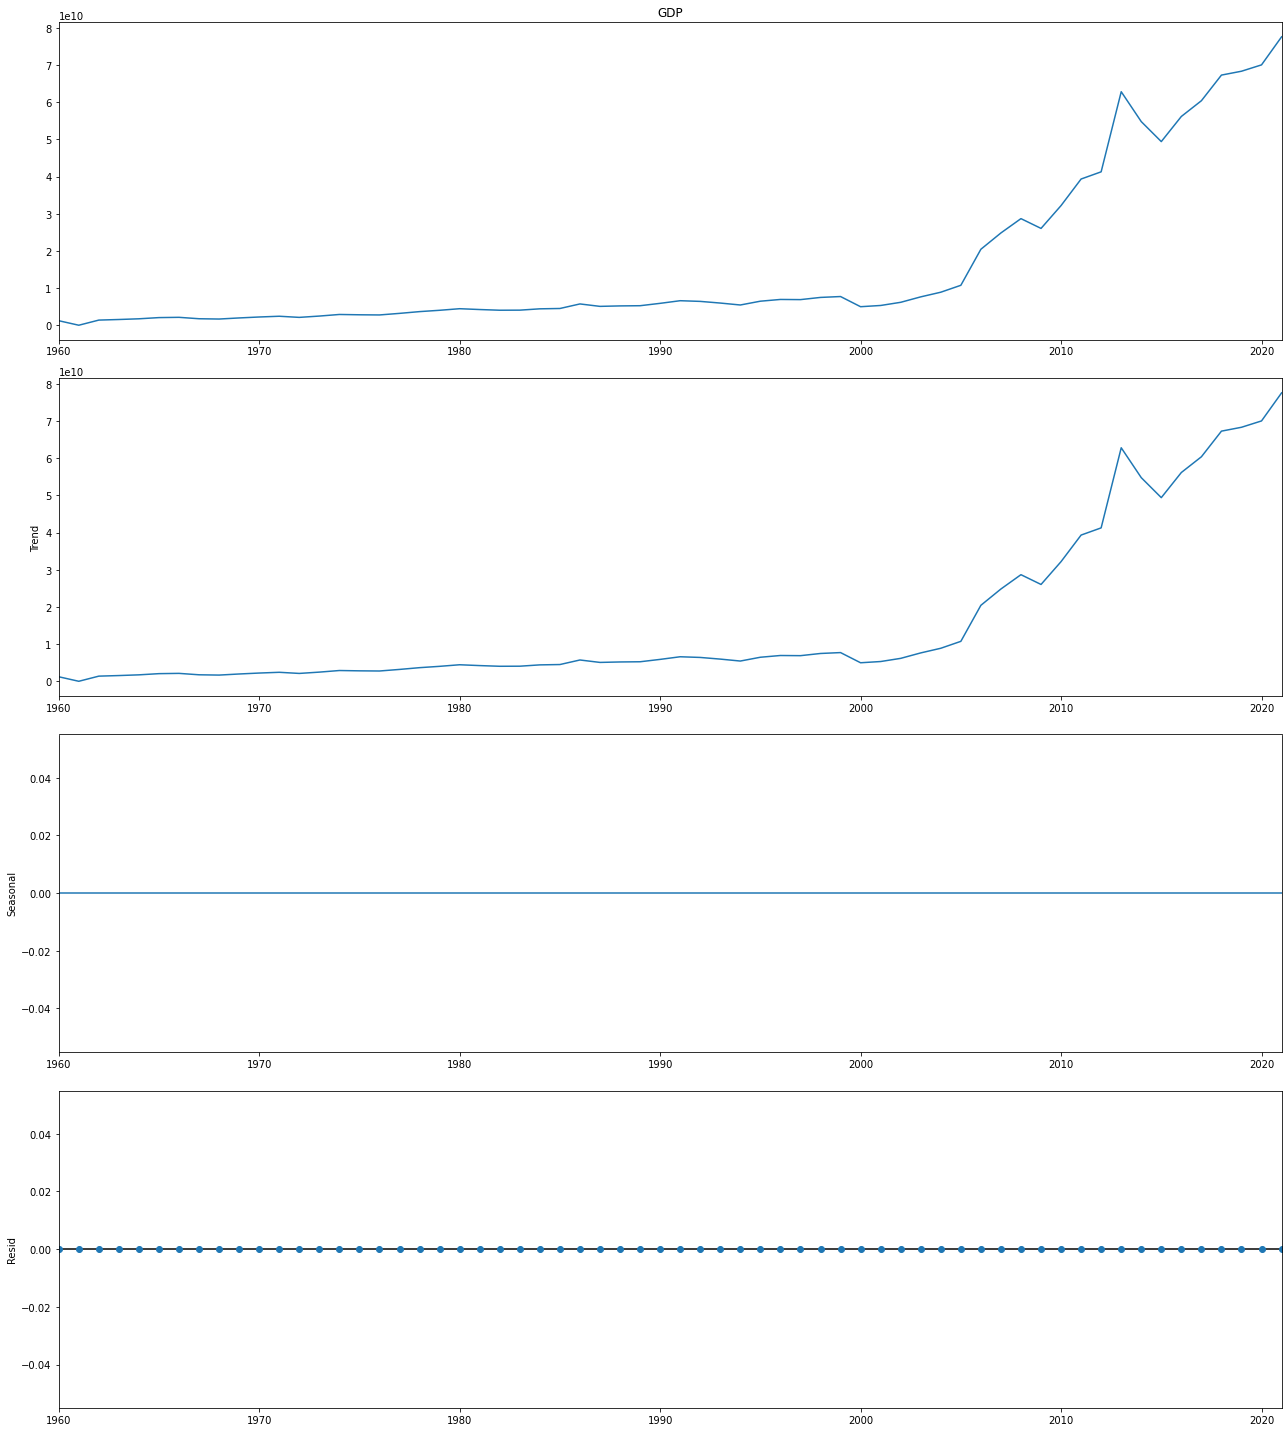

In [67]:
# производим декомпозицию временного ряда 

plt.rcParams["figure.figsize"] = 18, 20
result = seasonal_decompose(data["GDP"])
result.plot()
plt.show()

Вид временного ряда позволяет сделать пеодварительный вывод о наличии тренда и отсутствии сезонности

In [68]:
# последние три года из датасета возьмем как тестовую выборку для оценки результатов предсказания

train_df = data.iloc[:-3]
test_df = data.iloc[-3:]
train_df.shape, test_df.shape

((59, 1), (3, 1))

In [69]:
# визуализируем ряд построенный с помощью скользящего среднего прогноз (в зависимости от ширины окна)

fig = go.Figure()
for i in range (2,11):
    train_df = train_df.rolling(window=i).mean()
    fig.add_trace(go.Scatter(x=train_df.index, y=train_df.GDP, name=i))
    train_df = data.iloc[:-3]
fig.show()

Выберем ширину окна равной 6 (начиная с этого значения скользящее среднее перестает реагировать на выбросы, но при этом в наименьшей степени отклоняется от значений исходного ряда)

In [70]:
# визуализируем исходный ряд и ряд построенный с помощью скользящего среднего с выбранным значением окна

fig = go.Figure()
train_df = data.iloc[:-3]
train_df = train_df.rolling(window=6).mean()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df.GDP, name="MA-6"))
train_df = data.iloc[:-3]
fig.add_trace(go.Scatter(x=train_df.index, y=train_df.GDP, name="source"))
fig.show()

In [71]:
# с помощью теста Дики-Фуллера оценим стационарность временного ряда и примем решение о выборе модели ARMA/ARIMA

test = adfuller(train_df.GDP)
print("adf: ", test[0])
print("p-value: ", test[1])
print("Critical values: ", test[4])
if test[0] > test[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  0.6529066974885349
p-value:  0.9888496277665572
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
ряд нестационарен


Так как ряд не стационарен будем использовать модель ARIMA.
Определим количество дифференцирований, необходимых для сведения ряда к стационарному (параметр d для модели ARIMA).

In [72]:
# Определим количество дифференцирований, необходимых для сведения ряда к стационарному (параметр d для модели ARIMA)

d = 0
train_df = data.iloc[:-3]
for i in range (1,10):
    train_diff = train_df.diff(i).dropna()
    test = adfuller(train_diff.GDP)
    if test[0] > test[4]["5%"]:
        d = i
    train_diff = train_df
    if test[0] > test[4]["5%"]:
        print("d= ", i," ряд нестационарен")
    else:
        print("d= ", i," ряд стационарен")

d=  1  ряд нестационарен
d=  2  ряд стационарен
d=  3  ряд стационарен
d=  4  ряд нестационарен
d=  5  ряд стационарен
d=  6  ряд нестационарен
d=  7  ряд нестационарен
d=  8  ряд нестационарен
d=  9  ряд нестационарен


Параметр d равен 2.  
Параметры p и q выберем по коррелограммам ACF и PACF.

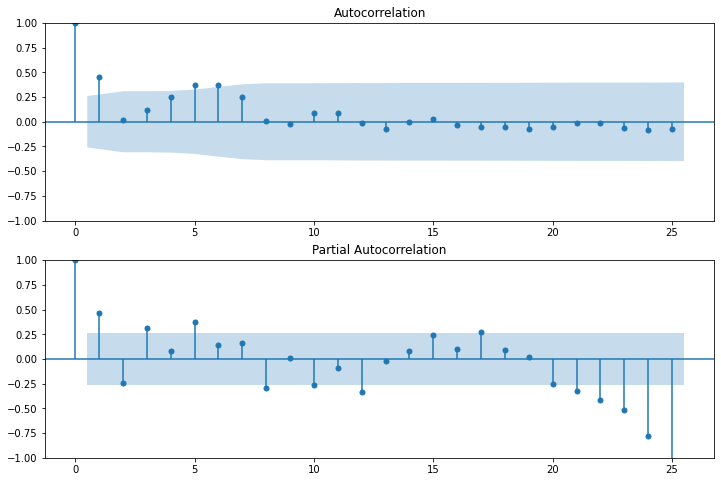

In [73]:
%matplotlib inline 
train_diff = data.iloc[:-3].diff(periods=2).dropna() 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_diff, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, а по коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций становятся ниже уровня значимости.

In [74]:
# Построим модель ARIMA со следующими параметрами: p = 1, d = 2, q = 1 
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df.GDP.dropna(), order=(1, 2, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   59
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1339.208
Date:                Tue, 23 May 2023   AIC                           2684.416
Time:                        15:06:38   BIC                           2690.545
Sample:                    01-01-1960   HQIC                          2686.798
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1775      0.082     -2.159      0.031      -0.339      -0.016
ma.L1         -0.8688      0.046    -19.069      0.000      -0.958      -0.780
sigma2       1.96e+19   2.13e-22    9.2e+40      0.000    1.96e+19    1.96e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               276.42
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):             325.65   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.49e+56. Standard errors may be unstable.
"""

In [75]:
# Подберем наилучшие параметры с помощью пакета pmdarima

import pmdarima as pm

smodel = pm.auto_arima(
    train_df.GDP.dropna(),
    start_p=1,
    start_q=1,
    d=2,
    max_p=10,
    max_q=10,
    seasonal=False,
    test="adf",
    #n_jobs=-1,
    error_action="ignore",
    trace= True,
)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2687.339, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2721.886, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2706.594, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2687.662, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2719.959, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=2686.054, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2694.896, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=2687.799, Time=0.09 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2695.926, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2683.782, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2684.416, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2693.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(1, 2, 3)   Log Likelihood               -1335.382
Date:                Tue, 23 May 2023   AIC                           2680.765
Time:                        15:06:42   BIC                           2690.980
Sample:                    01-01-1960   HQIC                          2684.735
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5682      0.163     -3.487      0.000      -0.888      -0.249
ma.L1         -0.4241      0.235     -1.803      0.071      -0.885       0.037
ma.L2         -0.8256      0.169     -4.886      0.000      -1.157      -0.494
ma.L3          0.5193      0.137      3.790      0.000       0.251       0.788
sigma2      1.868e+19   8.55e-21   2.18e+39      0.000    1.87e+19    1.87e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               173.00
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             141.34   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.43e+55. Standard errors may be unstable.
"""

Получены оптимальные параметры (p, d, q) равные (1,2,3).

In [76]:
# Построим модель с наилучшими параметрами

arima_model = ARIMA(train_df.GDP.dropna(), order=(1, 2, 3))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   59
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1335.382
Date:                Tue, 23 May 2023   AIC                           2680.765
Time:                        15:06:43   BIC                           2690.980
Sample:                    01-01-1960   HQIC                          2684.735
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5682      0.163     -3.487      0.000      -0.888      -0.249
ma.L1         -0.4241      0.235     -1.803      0.071      -0.885       0.037
ma.L2         -0.8256      0.169     -4.886      0.000      -1.157      -0.494
ma.L3          0.5193      0.137      3.790      0.000       0.251       0.788
sigma2      1.868e+19   8.55e-21   2.18e+39      0.000    1.87e+19    1.87e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               173.00
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             141.34   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.43e+55. Standard errors may be unstable.
"""

In [77]:
# выполним предсказание для отложенной тестовой выборки

pred_df = pd.DataFrame(index=data.index)
pred_df["model_preds"] = arima_model_fit.predict(
start=test_df.index[0], end=test_df.index[-1]   
)
pred_df["GDP"] = data["GDP"]

forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP"]

In [78]:
pred_df["model_preds"]

year
1960-01-01             NaN
1961-01-01             NaN
1962-01-01             NaN
1963-01-01             NaN
1964-01-01             NaN
                  ...     
2017-01-01             NaN
2018-01-01             NaN
2019-01-01    6.789080e+10
2020-01-01    7.253326e+10
2021-01-01    7.517348e+10
Name: model_preds, Length: 62, dtype: float64

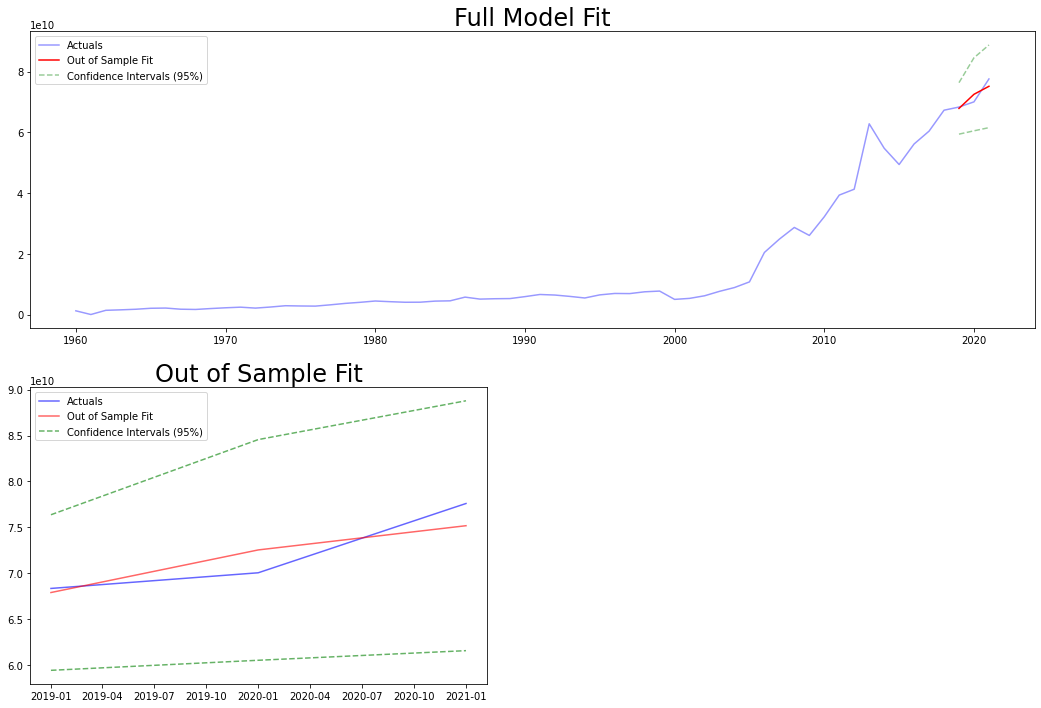

In [79]:
# построим графики истинного и предсказанного поведения временного ряда

plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["GDP"], color="blue", label="Actuals", alpha=0.4)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=24)
plt.legend()

plt.subplot(2, 2, 3)

plt.plot(
    pred_df.loc[test_df.index]["GDP"], color="blue", label="Actuals", alpha=0.6
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

plt.title("Out of Sample Fit", size=24)
plt.legend()

plt.show()

_______________________________

### 5. Интерполяция и сэмплирование

✍ Иногда можно столкнуться с отсутствием данных, например когда вы обрабатываете показания счётчика потребления горячей и холодной воды, а он по какой-то причине не работал несколько дней. Пропуски могут быть заполнены значениями NaN или нулями.

Взгляните на график ниже: за два дня (конец декабря и начало января) данные отсутствуют (они равны нулю) — из-за этого образуются спады до 0 в районе января.

<img src="data\MATHML_md13_5_1.png" alt="drawing" width="500"/>

Хотим ли мы, чтобы модель, которая должна предсказывать объём потребления воды, учитывала эти значения, равные нулю? Очевидно, нет. Значит, нам нужно каким-то образом заполнить пропуски, причём заполнение нулями нам не подходит, а заполнение средним — тоже не самая эффективная идея.

А что, если у нас есть показания счётчика по дням, а заказчик хочет получить прогноз по часам? Тогда нам снова нужно как-то заполнить возникающие пропуски для часов.

**Upsampling** — это увеличение частоты выборки (повышение частоты дискретизации), например с минут до секунд. Также upsampling применяют для заполнения пропусков неизвестных значений. Для этой цели мы будем использовать **интерполяцию**.

**Downsampling** — это уменьшение частоты выборки, например с дней до месяцев.

#### DOWNSAMPLING

Начнём с простого — с downsampling.

По своей сути, downsampling — это перегруппировка. Мы можем сгруппировать значения, полученные по дням, в значения, полученные за месяц, путём использования метода groupby(). Однако существует ещё один встроенный в DataFrame метод с чуть более широким функционалом — resample() https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html. Этот метод позволяет делать нестандартные группировки, такие как «за три дня» или «за каждые шесть секунд», то есть вы можете выбрать свой интервал группировки и получить результат, написав одну строку кода. Вызывать метод resample необходимо у датафрейма, в качестве индекса у которого используются даты в формате datetime. Например, если наш временной ряд с показаниями счетчика по потреблению воды изначально сгруппирован по дням, применив к нему resample, можно получить:

<img src="data\MATHML_md13_5_2.png" alt="drawing" width="200"/>

- общие количества за каждые три месяца (.resample("3M").sum())

<img src="data\MATHML_md13_5_3.png" alt="drawing" width="250"/>

- средние значения за каждые 20 часов (.resample("20h").mean())

<img src="data\MATHML_md13_5_4.png" alt="drawing" width="200"/>

- максимальные значения за каждый квартал (.resample("Q").max())

Дальше уже можно работать над построением модели.

Правила группировки (Q, H, M и др.) — это сокращения, используемые в работе с типом данных Timestamp. Полный перечень правил группировки можно найти в документации (таблица Date Offset) https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects.

Теперь пора переходить к upsampling. Но прежде рассмотрим понятие, которое мы уже упоминали выше, — «интерполяция».

#### ИНТЕРПОЛЯЦИЯ

Говоря простым языком, интерполяция — это нахождение некоторых промежуточных значений по функции, описывающей поведение данных. То есть если мы найдём такую функцию, значения которой будут совпадать с уже известными нам значениями, то можно предположить, что она поможет верно или приблизительно восстановить для нас неизвестные значения.

Существуют несколько способов нахождения этой функции, и интерполяция может быть выполнена с помощью:

- линейной функции,
- многочлена Лагранжа,
- интерполяционной формулы Ньютона,
- семейства сплайн-функций.

Если вы хотите подробно познакомиться с математикой, которая лежит в основе этих способов, рекомендуем вам прочитать книгу «Интерполяция. Методы и компьютерные технологии их реализации» А. М. Половко и П. Н. Бутусова.

### UPSAMPLING

Для реализации upsampling на практике мы будем использовать уже известный нам метод resample, чтобы декомпозировать данные, например от дня к часам, а затем воспользуемся встроенным методом interpolate() https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html, который принимает в качестве аргумента указание метода интерполяции: 'linear', 'nearest', 'spline', 'barycentric', 'polynomial' и другие. То есть сначала мы применяем к данным resample() с параметром h (час), а затем вместо агрегирующей функции sum/mean и др. применяем interpolate('linear'), чтобы выполнить линейную интерполяцию.

Пример результата выполнения функции — ниже. Мы можем применить её к одному из ранее использованных в модуле временных рядов.

<img src="data\MATHML_md13_5_5.png" alt="drawing" width="400"/>

________________________

### 6. Интерполяция и сэмплирование. Практика

In [80]:
data = pd.read_csv("data/ghana_gdp.csv", parse_dates=["GDP (current US$)"], index_col=["year"])
data.rename(columns = {'GDP (current US$)':'GDP'}, inplace=True) 

data["GDP"] = data["GDP"].astype(float)
data.index = pd.to_datetime(data.index)

In [81]:
# заменим нулевое значение GDP в 1961 году на NaN

data['GDP'] = data['GDP'].apply(lambda x: np.nan if x == 0 else x)

In [82]:
# найдем промежуточные значения методом интерполяции 

interpolated_data = pd.DataFrame(data.GDP.resample("w-MON").mean().interpolate(), columns=["GDP"])
print(interpolated_data.shape)

fig = px.line(interpolated_data, x=interpolated_data.index, y=interpolated_data.GDP)
fig.show()

(3184, 1)


In [83]:
# последние три года из датасета возьмем как тестовую выборку для оценки результатов предсказания

train_df = interpolated_data.loc[:"2018-12-31"]
test_df = interpolated_data.loc["2019-01-01":]
train_df.shape, test_df.shape

((3079, 1), (105, 1))

In [84]:
# с помощью теста Дики-Фуллера оценим стационарность временного ряда после интерполяции 

test = adfuller(train_df.GDP.dropna())
print("adf: ", test[0])
print("p-value: ", test[1])
print("Critical values: ", test[4])
if test[0] > test[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  0.8468254882828299
p-value:  0.9923556263977104
Critical values:  {'1%': -3.4324769950286993, '5%': -2.8624797725851847, '10%': -2.567270264186603}
ряд нестационарен


In [85]:
# определим количество дифференцирований, необходимых для сведения интерполированного ряда к стационарному (параметр d для модели ARIMA)

d = 0
train_df = interpolated_data.loc[:"2018-12-31"]
for i in range (1,10):
    train_diff = train_df.diff(i).dropna()
    test = adfuller(train_diff.GDP)
    if test[0] > test[4]["5%"]:
        d = i
    train_diff = train_df
    if test[0] > test[4]["5%"]:
        print("d= ", i," ряд нестационарен")
    else:
        print("d= ", i," ряд стационарен")

d=  1  ряд стационарен
d=  2  ряд стационарен
d=  3  ряд стационарен
d=  4  ряд стационарен
d=  5  ряд стационарен
d=  6  ряд стационарен
d=  7  ряд стационарен
d=  8  ряд стационарен
d=  9  ряд стационарен


In [86]:
# подберем наилучшие параметры с помощью пакета pmdarima

smodel = pm.auto_arima(
    train_df.GDP.dropna(),
    start_p=0,
    start_q=0,
    d=1,
    max_p=10,
    max_q=10,
    seasonal=False,
    test="adf",
    n_jobs=-1,
    error_action="ignore",
    trace= True,
)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=120134.106, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=116627.622, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=118117.785, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=120400.441, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=116552.144, Time=0.88 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=116496.529, Time=1.22 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=116458.380, Time=1.52 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=116432.507, Time=2.74 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=116414.825, Time=2.67 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=116402.640, Time=3.37 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=116394.223, Time=3.55 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=116388.439, Time=4.65 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=116384.528, Time=5.19 sec
 ARIMA(10,1,1)(0,0,0)[0] intercept   : AIC=116357.236, Time=9.05 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3079
Model:              SARIMAX(1, 1, 10)   Log Likelihood              -58138.991
Date:                Tue, 23 May 2023   AIC                         116303.983
Time:                        15:10:39   BIC                         116382.399
Sample:                    01-04-1960   HQIC                        116332.152
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.634e+05   2.94e-11   1.57e+16      0.000    4.63e+05    4.63e+05
ar.L1          0.9496      0.001    746.010      0.000       0.947       0.952
ma.L1         -0.2298      0.001   -155.094      0.000      -0.233      -0.227
ma.L2         -0.1192      0.002    -70.427      0.000      -0.123      -0.116
ma.L3         -0.0670      0.002    -31.866      0.000      -0.071      -0.063
ma.L4         -0.0406      0.003    -15.624      0.000      -0.046      -0.036
ma.L5         -0.0260      0.003     -8.289      0.000      -0.032      -0.020
ma.L6         -0.0172      0.004     -4.652      0.000      -0.024      -0.010
ma.L7         -0.0116      0.004     -2.723      0.006      -0.020      -0.003
ma.L8         -0.0077      0.005     -1.607      0.108      -0.017       0.002
ma.L9         -0.0046      0.005     -0.862      0.389      -0.015       0.006
ma.L10        -0.0013      0.006     -0.231      0.817      -0.013       0.010
sigma2      2.037e+14   9.45e-18   2.16e+31      0.000    2.04e+14    2.04e+14
===================================================================================
Ljung-Box (L1) (Q):                 244.05   Jarque-Bera (JB):         114818463.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                           -22.97
Prob(H) (two-sided):                  0.00   Kurtosis:                       948.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+45. Standard errors may be unstable.
"""

In [87]:
# Построим модель с наилучшими параметрами (1, 1, 10)

arima_model2 = ARIMA(train_df.GDP.dropna(), order=(1, 1, 10))
arima_model_fit2 = arima_model2.fit()
arima_model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                 3079
Model:                ARIMA(1, 1, 10)   Log Likelihood              -58151.461
Date:                Tue, 23 May 2023   AIC                         116326.922
Time:                        15:10:46   BIC                         116399.307
Sample:                    01-04-1960   HQIC                        116352.925
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9511      0.001    737.948      0.000       0.949       0.954
ma.L1         -0.2263      0.002   -150.147      0.000      -0.229      -0.223
ma.L2         -0.1189      0.002    -68.952      0.000      -0.122      -0.115
ma.L3         -0.0678      0.002    -31.786      0.000      -0.072      -0.064
ma.L4         -0.0413      0.003    -15.670      0.000      -0.046      -0.036
ma.L5         -0.0265      0.003     -8.342      0.000      -0.033      -0.020
ma.L6         -0.0176      0.004     -4.711      0.000      -0.025      -0.010
ma.L7         -0.0119      0.004     -2.769      0.006      -0.020      -0.003
ma.L8         -0.0079      0.005     -1.632      0.103      -0.017       0.002
ma.L9         -0.0047      0.005     -0.865      0.387      -0.015       0.006
ma.L10        -0.0010      0.006     -0.177      0.860      -0.013       0.011
sigma2      2.039e+14   1.19e-17   1.72e+31      0.000    2.04e+14    2.04e+14
===================================================================================
Ljung-Box (L1) (Q):                 231.57   Jarque-Bera (JB):         119551036.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                           -23.34
Prob(H) (two-sided):                  0.00   Kurtosis:                       967.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.82e+45. Standard errors may be unstable.
"""

In [88]:
# выполним предсказание для отложенной тестовой выборки

pred_df2 = pd.DataFrame(index=interpolated_data.index)

pred_df2["model_preds"] = arima_model_fit2.predict(
    start=test_df.index[0], end=test_df.index[-1]
)

pred_df2["GDP"] = interpolated_data["GDP"]

forecast2 = arima_model_fit2.get_forecast(len(test_df.index))
forecast_df2 = forecast2.conf_int(alpha=0.05)  # Confidence level of 95%

pred_df2.at[test_df.index, "model_preds_lower"] = forecast_df2["lower GDP"]
pred_df2.at[test_df.index, "model_preds_upper"] = forecast_df2["upper GDP"]

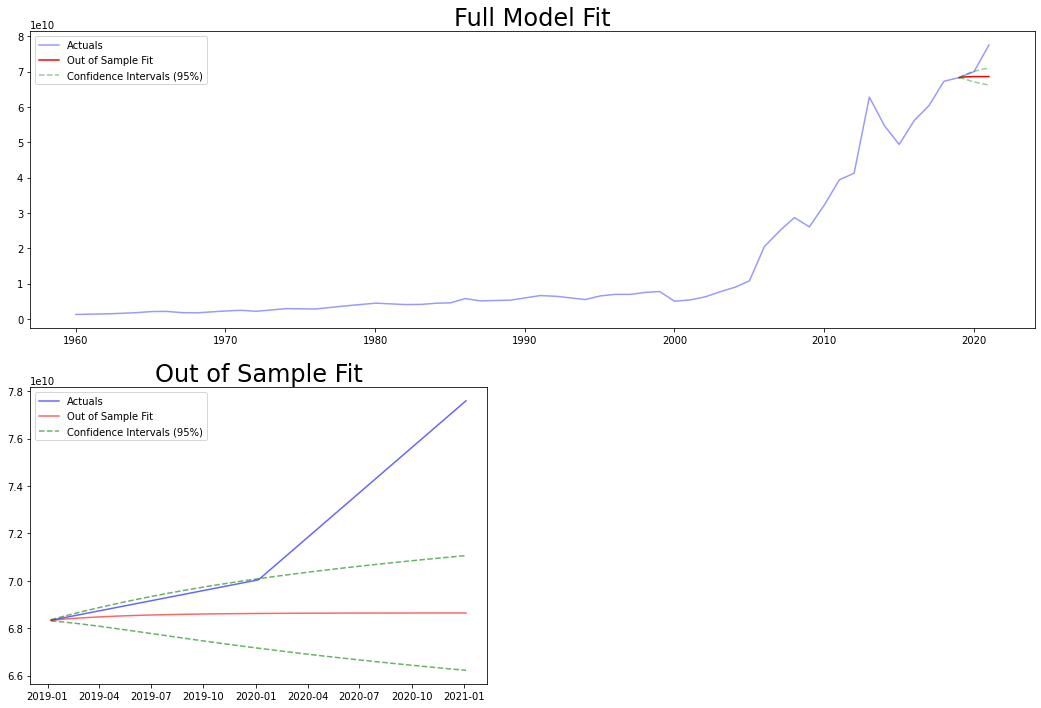

In [89]:
# построим графики истинного и предсказанного поведения временного ряда

plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(interpolated_data["GDP"], color="blue", label="Actuals", alpha=0.4)

plt.plot(
    pred_df2.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

plt.plot(
    pred_df2.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

plt.plot(
    pred_df2.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=24)
plt.legend()

plt.subplot(2, 2, 3)

plt.plot(
    pred_df2.loc[test_df.index]["GDP"], color="blue", label="Actuals", alpha=0.6
)

plt.plot(
    pred_df2.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

plt.plot(
    pred_df2.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

plt.plot(
    pred_df2.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

plt.title("Out of Sample Fit", size=24)
plt.legend()

plt.show()

___________________________________________________________

### 7. Модели прогнозирования гетероскедастичности

✍ Мы уже изучили основные свойства временных рядов, но у них есть ещё одна интересная и нередко встречающаяся особенность. Обратите внимание на график квартального дохода компании Wal-Mart. Видно, что присутствует тренд. Но какую ещё особенность вы видите?

<img src="data\MATHML_md13_7_1.png" alt="drawing" width="800"/>

Прежде чем перейти к обсуждению, вспомним, что такое дисперсия.

**Дисперсия** — это статистический показатель, показывающий меру разброса данных вокруг среднего значения.

Если мы проведём на графике усреднённую прямую (красный пунктир), будет заметно, что ближе к 1997 году точки имеют больший разброс, чем в начале, то есть дисперсия данных изменчива во времени.

Подобная неоднородность наблюдений, выражающаяся в неодинаковой дисперсии, называется **гетероскедастичностью**.

Такой характер дисперсии можно часто встретить во временных рядах из финансовой сферы, поскольку они более подвержены **гетероскедастичности**.

Отсутствие гетероскедастичности называется гомоскедастичностью.

Сравните графики временных рядов ниже:

**Гомоскедастичный временной ряд**

<img src="data\MATHML_md13_7_2.png" alt="drawing" width="400"/>
<img src="data\MATHML_md13_7_4.png" alt="drawing" width="600"/>
<img src="data\MATHML_md13_7_6.png" alt="drawing" width="400"/>

**Гетероскедастичный временной ряд**

<img src="data\MATHML_md13_7_3.png" alt="drawing" width="400"/>
<img src="data\MATHML_md13_7_5.png" alt="drawing" width="600"/>
<img src="data\MATHML_md13_7_7.png" alt="drawing" width="400"/>


Изученные нами модели помогают учесть тренд и сезонность. Но что насчёт дисперсии? Обычно, если временной ряд обладает гетероскедастичностью, такие модели не способны уловить изменение дисперсии во времени, и их предсказания выглядят примерно так:

<img src="data\MATHML_md13_7_8.png" alt="drawing" width="600"/>

Видно, что в предсказании мы не учли разброс — прогноз хочется «вытянуть» вверх, таким образом увеличивая дисперсию. Такая проблема часто возникает в волатильных временных рядах. Понятие волатильности также относится к финансовым временным рядам и является одним из самых важных финансовых показателей и понятий в управлении финансовыми рисками.

**Волатильность** представляет собой меру риска использования финансового инструмента за заданный промежуток времени. Иными словами, волатильность показывает меру изменчивости и часто измеряется в процентах или долях. Предсказание волатильности, например, позволяет инвесторам определить риск приобретения финансового инструмента.

Для таких данных с непостоянной дисперсией был разработан ещё один класс моделей — семейство моделей авторегрессионной условной гетероскедастичности, или **ARCH (Autoregressive Conditional Heteroscedastic Model)**.



**ARCH И GARCH**

Давайте сначала разберёмся, как устроена модель ARCH, а затем поговорим о том, как правильно её применять.

Ниже представлен график ошибок предсказания некоторого временного ряда. Что с ним не так?

<img src="data\MATHML_md13_7_9.png" alt="drawing" width="600"/>

В прошлом модуле мы обсуждали, что в хорошей модели, учитывающей все зависимости, в остатках должен получиться белый шум. Однако белый шум должен иметь одинаковое распределение на всех участках временного ряда, а значит, иметь одинаковые математическое ожидание и дисперсию.

Если на графике выше с математическим ожиданием всё в порядке (среднее значение в нуле), то к дисперсии есть вопросы, так как видно, что она различна на разных промежутках (разброс в разные годы отличен).

Ранее мы уже говорили, что модели семейства ARMA способны предсказывать тренд и сезонность, но, к сожалению, не изменчивость дисперсии. Модель ARCH была разработана лауреатом Нобелевской премии по экономике Робертом Энглом в 1982 г. для решения подобных проблем. В ней используется зависимая от времени условная дисперсия, которая выражается через квадрат предыдущих значений.

$\sigma^2(t)=a+\sum_{i=1}^{q}b_ir_{t-1}^2$

Здесь q — количество слагаемых, которые влияют на текущее значение, а b — весовые коэффициенты, которые влияют на степень значимости предыдущих изменений дисперсии (r). То есть волатильность моделируется в виде суммы константы (a — базовая волатильность, константа) и линейной функции абсолютных значений изменения нескольких последних цен.

**Обратите внимание**: из-за квадрата в формуле волатильность предсказывается только в абсолютном значении (то есть по модулю).

Чуть позднее другой учёный, Тим Боллерслерв, предложил обобщённую концепцию модели ARCH — **GARCH (Generalized Autoregressive Conditional Heteroscedastic Model)**. Модель предполагала, что на изменчивость дисперсии влияют не только предыдущие изменения показателей, но и предыдущие оценки дисперсии (значение дисперсии).

$\sigma^2(t)=a+\sum_{i=1}^{q}b_ir_{t-1}^2+\sum_{i=1}^{p}c_i \sigma_{t-1}^2$

- первая часть формулы — ARCH-модель;
- p — количество оценок, предшествующих текущей, которые влияют на текущее значение;
- c — это весовые коэффициенты, которые влияют на степень значимости предыдущих дисперсий ($\sigma^2$).
Как и в случае AR-моделей, эти коэффициенты настраиваются автоматически в процессе обучения.

ARCH и GARCH https://arch.readthedocs.io/en/latest/univariate/introduction.html — наиболее популярные модели, используемые при прогнозе волатильности. Существуют и их модернизации, такие как A-GARCH, E-GARCH и многие другие. В будущем, если вам придётся тесно работать с финансовыми временными рядами, вы сможете самостоятельно познакомиться с этими моделями.

#### КОГДА ПРИМЕНЯТЬ ARCH И GARCH?

- Когда ряд похож на белый шум, но при этом в нём присутствует гетероскедастичность.
Чтобы определить, является ли ряд гетероскедастичным (с меняющейся дисперсией), можно отобразить его квадраты на графике и понаблюдать за поведением дисперсии.

- Когда после применения AR-модели остатки (ошибки модели) тоже являются гетероскедастичными. В этом случае вы также можете прогнозировать дисперсию ошибок и использовать её в итоговом предсказании. Для этого необходимо суммировать результаты AR-модели с результатами ARCH.

Давайте дополним нашу схему выбора модели, основываясь на информации из этого юнита:

<img src="data\MATHML_md13_7_10.png" alt="drawing" width="900"/>

**ДОПОЛНИТЕЛЬНО:**

1. Задача моделирования остатков.  https://medium.com/@ranjithkumar.rocking/time-series-model-s-arch-and-garch-2781a982b448  
2. Короткая лекция с разбором математики ARCH и GARCH. https://www.youtube.com/watch?v=Li95a2biFCU  

____________________________________________________

### 8. Валидация временных рядов

✍ Наиболее важным отличием работы с временными рядами от работы с другими данными является то, что к временным рядам нельзя применять обычный подход разбиения на тренировочную и тестовую выборки, тем более делая это случайным образом.

Таким образом, метод train_test_split не подходит, так как он разбивает данные случайным образом. В результате нарушается временная связь между данными ряда.

<img src="data\MATHML_md13_8_1.png" alt="drawing" width="600"/>

Для данных временного ряда разбиение на тренировочный и тестовый сеты нужно выполнять последовательно, иначе в алгоритм просочится информация из будущего, на которой он и обучается.

Последовательное разбиение может выглядеть так (train, test):

<img src="data\MATHML_md13_8_2.png" alt="drawing" width="400"/>

То есть в случае с данными на графике выше правильно будет разбить их как train = [0,1,2,3,4,5] и test = [6,7,8,9]. Соотношение объёма выборок, конечно, может быть другим, но главное — выборки должны идти последовательно.

#### АНАЛОГ КРОСС-ВАЛИДАЦИИ ДЛЯ ВРЕМЕННЫХ РЯДОВ

Если использовать обычную кросс-валидацию, информация из будущего снова просочится в алгоритм. Поэтому вместо кросс-валидации используются:

- walk forward validation;
- множественное разбиение.

<img src="data\MATHML_md13_8_3.png" alt="drawing" width="900"/>

Обратите внимание на изображения выше. В обоих случаях мы также соблюдаем последовательность в разбиении — сравните с обычной кросс-валидацией (слева). Оба разбиения действуют по схожему принципу — делят выборки упорядоченно, чтобы подвыборка test всегда выбиралась после подвыборок train. Отличием будет то, что в walk forward validation размер обучающих выборок во всех фолдах (разбиениях) будет одинаковым, а во множественном разбиении в каждом новом фолде данные обучающей выборки накапливаются.

Следующее задание необходимо выполнить самостоятельно в Jupyter Notebook. Для этого вы можете использовать временной ряд из вашего проекта.

**Задание 8.3**

<img src="data\MATHML_md13_8_4.png" alt="drawing" width="500"/>


Разбейте временной ряд на три набора (3 train + 3 test). Для этого воспользуйтесь классом TimeSeriesSplit из sklearn.model_selection с параметрами n_splits=3 и test_size=7 (или max_train_size=df.sales.count()-7). Наборы данных можно получить, вызвав метод split (временной ряд) у инициализированного TimeSeriesSplit.

Пример кода:

    tscv = TimeSeriesSplit(...)

Выведите размеры полученных подвыборок:

    train_test_groups = tscv.split(df.sales)    
    for train_index, test_index in train_test_groups:     
        print("TRAIN size:", len(train_index), "TEST size:", len(test_index))  

Обратите внимание на отличие в размерах выборок на рисунке с walk forward validation и множественным разбиением. В задании вы вывели размеры полученных выборок. Какой случай вы получили?

In [90]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit (n_splits=3, test_size=7)
train_test_groups = tscv.split(data.GDP)    
for train_index, test_index in train_test_groups:     
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))  

TRAIN size: 41 TEST size: 7
TRAIN size: 48 TEST size: 7
TRAIN size: 55 TEST size: 7


___________________________________________

### 9. Модели прогнозирования гетероскедастичности. Валидация временных рядов. Практика

✍ Посмотрите скринкаст по решению задачи предсказания дисперсии волатильности финансового временного ряда. После этого самостоятельно выполните задания для своего проекта.

- данные из скринкаста https://lms.skillfactory.ru/assets/courseware/v1/c6e0ef1c0f6941f42a1e14d7af470ac1/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/sp500.zip; 
- ноутбук из скринкаста https://lms.skillfactory.ru/assets/courseware/v1/e5b6db0669d6521de50cebb71e218894/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/project-Part3.ipynb.
  
В скринкасте мы получаем предсказания с помощью model_results.forecast().

Любое обращение к методу forecast() возвращает объект ARCHModelForecast с тремя основными атрибутами:

- .mean — условное среднее значение ряда;  
- .variance — условная дисперсия прогноза;  
- .residual_variance — прогнозируемая условная дисперсия остатков. Residual_variance будет отличаться от variance в случаях, когда значения ряда (не дисперсии, а именно сами значения) имеют зависимость от себя в прошлом. В скринкасте для предсказания дисперсии мы используем residual_variance, так как в нашем случае ряд стационарен и residual_variance и variance возвращают одинаковые значения.  

**ЗАДАНИЯ ДЛЯ ПРОЕКТА**

- Посчитайте волатильность для вашего временного ряда.
- Используйте GARCH-модель для предсказания волатильности.
- Используйте линейную регрессию для получения прогноза.
- Визуализируйте полученное предсказание вместе с фактическим значением.
- Сравните результаты и сделайте выводы.  
  
Почему результат модели GARCH получился именно таким?
Судя по полученному графику, модель не уловила дисперсию, так как такое поведение было для неё новым и подобные случаи отсутствовали в обучающей выборке. В примере из скринкаста был противоположный результат, так как имелось больше данных и в обучающей выборке были случаи и возрастания, и убывания дисперсии, что удалось уловить модели.

In [91]:
# посчитаем волотильность исходного времнного ряда

data["GDP_vol"] = data.GDP.pct_change(1).mul(100).abs()
data["GDP_vol"].head()

year
1960-01-01          NaN
1961-01-01     0.000000
1962-01-01    13.578826
1963-01-01    11.448835
1964-01-01    12.363636
Name: GDP_vol, dtype: float64

In [92]:
# визуализируем динамику волотильности

fig = px.line(data, x=data.index, y=data.GDP_vol)
fig.show()

In [93]:
# последние три года из датасета возьмем как тестовую выборку для оценки результатов предсказания

train_df = data.iloc[:-3]
test_df = data.iloc[-3:]
train_df.shape, test_df.shape

((59, 2), (3, 2))

In [94]:
garch_df = pd.DataFrame(data["GDP_vol"].loc[data.index])

# далее необходимо использовать актуальные обучающие данные, которые находятся в выборке train_df.
# Мы никак не преобразовывали нашу обучющую выборку, поэтому фактически, train_df совпадает с данными в data,
# Но если вы применяете к вашей обечающей выборке какие либо преобразования, например скользящее среднее
# для сглаживания, то необходимо передать измененный train_df датасет.

garch_df.loc[train_df.index, "GDP_vol"] = train_df["GDP_vol"].dropna()

In [95]:
model = arch_model(garch_df["GDP_vol"].dropna(), p=6, q=3)

# в параметре last_obs указываем последний объект, до которого будем совершать обучение.
# в нашем случае это до первого объекта из test выборки

model_results = model.fit(last_obs=test_df.index[0], update_freq=5)

Iteration:      5,   Func. Count:     64,   Neg. LLF: 228.36076935848155
Iteration:     10,   Func. Count:    124,   Neg. LLF: 227.58471375966252
Iteration:     15,   Func. Count:    185,   Neg. LLF: 227.44011879847926
Optimization terminated successfully    (Exit mode 0)
            Current function value: 227.44016984799663
            Iterations: 19
            Function evaluations: 223
            Gradient evaluations: 18


In [96]:
# Получим прогноз для тестовой выборки

predictions_df = test_df.copy()
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[
    test_df.index
]

In [97]:
predictions_df

,GDP,GDP_vol,Predictions
year,,,
2019-01-01,6.833754e+10,1.542746,279.382251
2020-01-01,7.004320e+10,2.495937,283.590872
2021-01-01,7.759428e+10,10.780603,302.600110


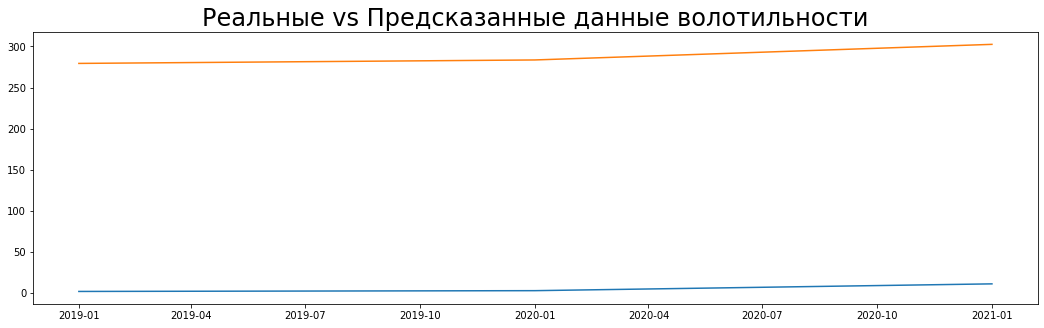

In [98]:
# визуализируем реальные и предсказанныне значения волотильности

plt.rcParams["figure.figsize"] = 18, 5

plt.plot(predictions_df["GDP_vol"].abs())
plt.plot(predictions_df["Predictions"])
plt.title("Реальные vs Предсказанные данные волотильности", size=24)
plt.show()

In [99]:
# получим среднеквадратичную ошибку при определении волатильности

mean_squared_error(
    predictions_df["GDP_vol"].abs(), predictions_df["Predictions"]
)

80455.92578291854

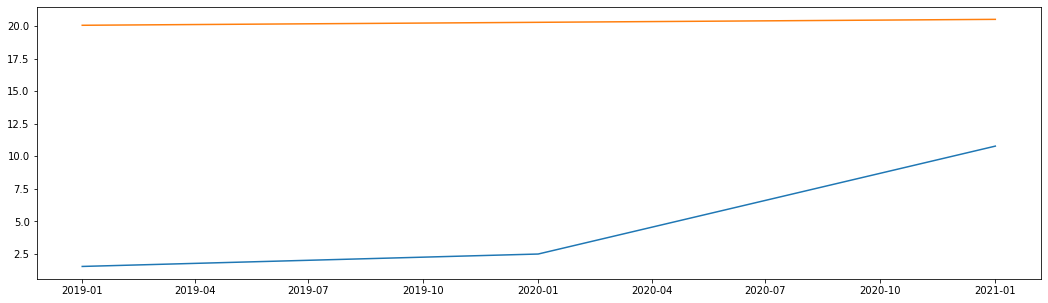

In [100]:
# используем линейную регрессию для получения прогноза волатильности

X_train = pd.DataFrame(range(data["GDP_vol"].shape[0]))[
    : train_df.shape[0]
].fillna(0)
X_test = pd.DataFrame(range(data["GDP_vol"].shape[0]))[
    train_df.shape[0] :
].fillna(0)
y_train = train_df["GDP_vol"].fillna(0)
y_test = test_df["GDP_vol"].fillna(0)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)


plt.plot(y_test)
# plt.plot(y_train)
plt.plot(pd.Series(lr_predict, index=y_test.index))
plt.show()

In [101]:
# получим среднеквадратичную ошибку при определении волатильности

mean_squared_error(y_test, lr_predict)

251.36459946844437

____________________

### 10. Другие методы предсказания временных рядов

✍ Мы рассмотрели наиболее распространённые статистические методы, которые используются уже много лет. Эти инструменты являются теоретической базой, и о них часто спрашивают на собеседованиях. Однако анализ временных рядов не ограничен этими инструментами. В этом юните мы кратко рассмотрим альтернативные методы анализа временных рядов, которые могут показать соизмеримые с классическими методами результаты.

Список открывает популярная модель с говорящим названием «Пророк» от Facebook*.

#### PROPHET

**Prophet** — это метод прогнозирования данных временных рядов на основе AR-модели, в которой учтены годовая, еженедельная и ежедневная сезонности, а также эффекты праздничных дней.

Prophet лучше всего работает с временными рядами, которые имеют сильные сезонные эффекты, а данные накоплены за несколько сезонов. Алгоритм устойчив к отсутствующим данным и сдвигам в тренде и обычно хорошо справляется с выбросами.

Prophet https://facebook.github.io/prophet/docs/quick_start.html#python-api — библиотека с открытым исходным кодом, выпущенная командой Facebook Core Data Science. Для загрузки метод также доступен в PyPI (через pip install) https://pypi.org/project/prophet/.

Prophet следует API модели sklearn. Это значит, что мы можем пользоваться им и его методами так же, как и в случае с моделями из sklearn: для инициализации модели создаётся экземпляр класса Prophet (myModel = Prophet()), а затем вызываются его методы обучения (.fit()) и прогнозирования (.predict()). Входные данные для методов Prophet должны представлять собой датафрейм с двумя столбцами — DS и Y.

- Столбец DS (отметка даты) должен иметь временной формат (DateTime), например ГГГГ-ММ-ДД — для даты или ГГГГ-ММ-ДД ЧЧ:ММ:СС — для отметки времени.  
- Столбец Y должен быть числовым и представлять измерение, которое мы хотим спрогнозировать.
В качестве примера давайте рассмотрим временной ряд ежедневных просмотров страницы футболиста Пейтона Мэннинга на Wikipedia.  

Импортируем Prophet и другие необходимые библиотеки, а также считаем датасет.

In [102]:
# pip install prophet

In [103]:
import pandas as pd
from prophet import Prophet

url = 'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'
df = pd.read_csv(url)
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Обучим модель на датасете:

In [104]:
model = Prophet()
model.fit(df)

15:10:54 - cmdstanpy - INFO - Chain [1] start processing
15:10:56 - cmdstanpy - INFO - Chain [1] done processing


Для получения прогноза необходимо использовать DataFrame со столбцом DS, содержащим даты, для которых должен быть сделан прогноз. Вы можете получить такой DataFrame, используя вспомогательный метод Prophet.make_future_dataframe(), в который необходимо передать число дней для совершения прогноза. По умолчанию он также будет включать более ранние даты, поэтому мы также увидим, как обучалась модель.

In [105]:
future_df = model.make_future_dataframe(periods=365)
future_df.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


В результате построения прогноза каждому DS будет присвоено прогнозируемое значение (YHAT). Также в прогнозном датафрейме будут два новых столбца ('yhat_lower', 'yhat_upper'), в которых будут находиться верхняя и нижняя границы доверительного интервала:

In [106]:
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204233,7.455349,8.927274
3266,2017-01-16,8.529241,7.820194,9.241241
3267,2017-01-17,8.316651,7.551550,9.050266
3268,2017-01-18,8.149239,7.432365,8.902220
3269,2017-01-19,8.161151,7.349683,8.875662


Мы можем отобразить прогноз, вызвав метод Prophet.plot и передав ему полученный датафрейм с результатами прогноза:

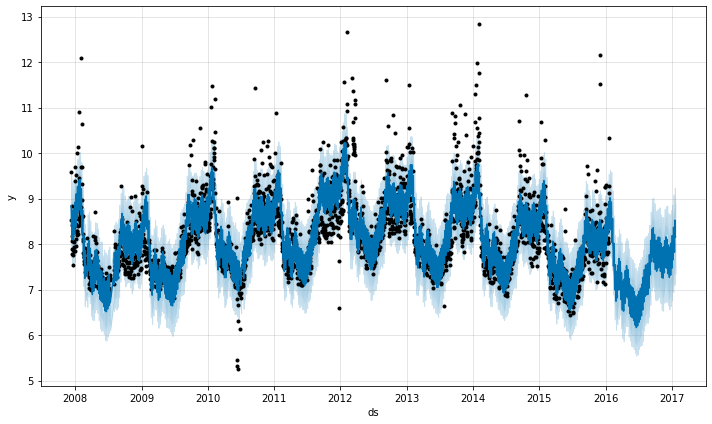

In [107]:
fig = model.plot(forecast_df)

Чтобы увидеть компоненты ряда, можно использовать метод Prophet.plot_components. По умолчанию предоставляются тренд и годовая и недельная сезонность временного ряда.

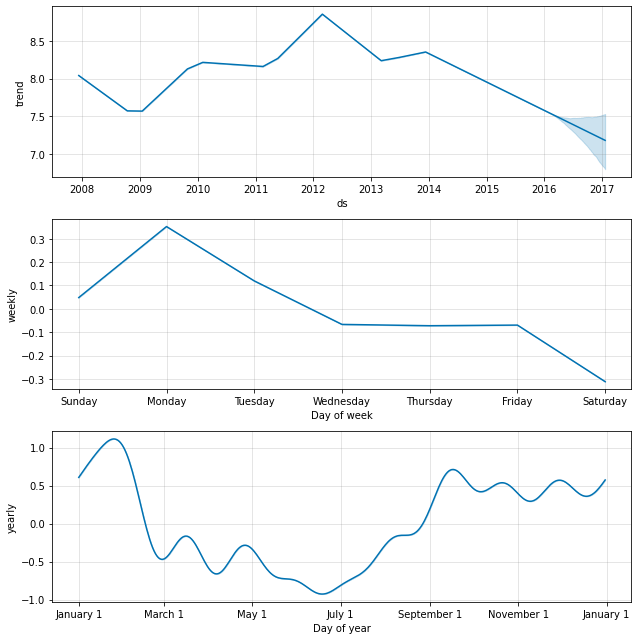

In [108]:
fig = model.plot_components(forecast_df)

**ДОПОЛНИТЕЛЬНО**:

Ниже представлены ссылки на статьи, где Prophet применяется в задачах временных рядов.

- Задача прогнозирования числа постов на Хабре https://habr.com/ru/company/ods/blog/323730/.
- Задача предсказания продаж автомобилей https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/.

#### NEURALPROPHET

NeuralProphet https://neuralprophet.com/ — основанная на PyTorch https://pytorch.org/ усовершенствованная и более сложная модель, которая комбинирует в себе преимущества традиционных моделей для анализа временных рядов и методов глубокого обучения. NeuralProphet можно установить с помощью pip (pip install neuralprophet).

In [109]:
# pip install neuralprophet

Вы ещё не знакомы с нейронными сетями, поэтому мы не будем углубляться в подробности реализации данного алгоритма. Тем не менее вы можете смело использовать эту библиотеку, так как запустить её в несколько шагов «из коробки» не представляет большого труда.

Познакомиться и поэкспериментировать с NeuralProphet вы можете, разбирая примеры из официального репозитория проекта на GitHub. Например, обратите внимание на решение задачи https://github.com/ourownstory/neural_prophet/blob/main/tutorials/application-example/energy_hospital_load.ipynb прогнозирования энергетической нагрузки на больницу в Сан-Франциско.

В этой русскоязычной статье https://habr.com/ru/company/otus/blog/555700/ представлен более подробный разбор алгоритма на примере решения задачи предсказания ежедневных просмотров страниц на Wikipedia, но уже с помощью NeuralProphet.

**ДОПОЛНИТЕЛЬНО**:

Если вас заинтересовали библиотеки Prophet и NeuralProphet, рекомендуем обратить внимание на эту статью https://towardsdatascience.com/prophet-vs-neuralprophet-fc717ab7a9d8. Помимо математического описания, там сравниваются результаты работы этих алгоритмов на реальной задаче.

#### МОДЕЛИ КЛАССИЧЕСКОГО ML

В практическом юните, при решении финансовой задачи, мы уже использовали линейную регрессию для получения прогноза. Таким же образом можно использовать другие модели машинного обучения:

- другие линейные модели регрессии (логистическая, ридж- и лассо-регрессия);
- ансамбли деревьев (случайный лес, градиентный бустинг над деревьями);
- SVM (метод опорных векторов);
- KNN (метод ближайших соседей);
- и др.

Чтобы улучшить результаты такого подхода, стоит уделить особое внимание feature engineering (добавлению признаков).

<img src="data\pic-1.png" alt="drawing" width="600"/>

1. В предыдущем модуле мы уже упоминали, что на временной ряд могут влиять внешние факторы. Так, например, в задаче предсказания числа посетителей кинотеатра могут быть важные второстепенные факторы, такие как наличие или отсутствия дождя и температура воздуха, а в задаче прогнозирования объёма заказов косметики — наличие или отсутствие рекламы этого товара в недавнее время. Всё это можно добавлять в качестве дополнительных признаков.

2. Также хорошей практикой является добавление в качестве признаков **лагов**. Мы уже знаем, что это сдвиг временного ряда во времени. Тут стоит избегать так называемых «ликов» (от англ. leak — утечка) — попаданий ответов в тестовую выборку. Так, если вам нужно сделать прогноз на семь дней вперёд, то в качестве признаков вы не можете использовать лаги с 1 по 7 (Для последнего дня из тестовой выборки будут неизвестны значения предыдущих шести дней, так как для них нам тоже нужно сделать предсказания), а вот взятие лагов больше размера тестовой выборки — хорошая практика. То есть если размер вашей тестовой выборки — семь дней, то лаги стоит брать, начиная с 8 и более.

3. Используя специальные методы, некоторое количество признаков для временных рядов можно получить от даты:

- час/минута/секунда,
- число,
- месяц,
- год,
- день недели,
- день в году,
- квартал,
- выходной или рабочий день,
- праздничный или рабочий день,
- другие признаки.

Часто добавление этих признаков даёт хороший прирост качества модели.

Несомненно, значимость таких признаков зависит от задачи, но совершенно точно временные ряды, напрямую связанные с человеческой деятельностью, зависимы от времени. Для добавления признаков от даты удобнее всего пользоваться встроенными методами Series.dt https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html. Для этого сначала необходимо привести столбец к типу Datetime, а затем вызвать интересующий вас метод. Например, для получения дня недели от даты можно выполнить следующий код:

In [110]:
# df['SomeDate'] = pd.to_datetime(df['SomeDate'])
# df['DayOfWeek'] = df['SomeDate'].dt.dayofweek

Сначала применяем к столбцу преобразование к Datetime, после чего вызываем .dt.dayofweek. Ознакомиться с полным перечнем доступных методов можно в официальной документации https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html.

В вашем проекте вы можете попробовать использовать инструменты из этого юнита. Это не входит в обязательную часть задания, но позволит вам сравнить результаты, полученные в вашем проекте, с результатами после применения альтернативных моделей.

_________________

### 12. Итоги

⭐ Поздравляем — вы освоили большой практический модуль по самым популярным статистическим моделям для анализа временных рядов.

За два прошедших модуля вы:

- узнали о временных рядах и их свойствах;
- изучили методы предсказаний:
    - экспоненциальное скользящее среднее,
    - SMA (простое скользящее среднее),
    - AR (авторегрессионная модель),
    - ARMA (авторегрессионное скользящее среднее),
    - ARIMA (интегрированная модель авторегрессионного скользящего среднего),
    - SARIMA (сезонная интегрированная модель авторегрессионного скользящего среднего),
    - SARIMAX (SARIMA с включением внешних факторов).
- узнали, в каких случаях и как реализовывать upsampling и downsampling;
- научились:
    - валидировать временные ряды;
    - работать с финансовыми временными рядами и настраивать для них модели ARCH и GARCH.

Теперь вы можете не бояться задач с временными рядами и смело делать предсказания во времени, а проект, реализованный в ходе изучения этого модуля, рекомендуем добавить в портфолио.

**ПОЛЕЗНЫЕ ССЫЛКИ МОДУЛЯ:**

**Статистические модели прогнозирования**

- ARMA https://www.statsmodels.org/v0.12.0/generated/statsmodels.tsa.arima_model.ARMA.html;  
- ARIMA https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html;  
- SARIMAX https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html;  
- “SARIMAX and ARIMA: FAQ” https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_faq.html.

- “How to Build ARIMA Model in Python for time series forecasting?” https://www.projectpro.io/article/how-to-build-arima-model-in-python/544;
- «Прогнозирование временных рядов с помощью ARIMA в Python 3» https://www.8host.com/blog/prognozirovanie-vremennyx-ryadov-s-pomoshhyu-arima-v-python-3/

**Интерполяция и сэмплирование**

- Правила группировки для метода resample() https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

**Модели прогнозирования гетероскедастичности**

- Introduction to ARCH Models https://arch.readthedocs.io/en/latest/univariate/introduction.html.  
- “Time Series Model(s) — ARCH and GARCH” https://medium.com/@ranjithkumar.rocking/time-series-model-s-arch-and-garch-2781a982b448;  
- “Time Series Talk: ARCH Model” (видеолекция) https://youtu.be/Li95a2biFCU.



**Другие методы предсказания временных рядов**

- Prophet https://facebook.github.io/prophet/docs/quick_start.html#python-api;  
- NeuralProphet https://neuralprophet.com/;  
- pandas.Series.dt https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html.  

- «Предсказываем будущее с помощью библиотеки Facebook Prophet» https://habr.com/ru/company/ods/blog/323730/;  
- “Time Series Forecasting With Prophet in Python” https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/;  
- “Building load forecasting: Hospital in SF” https://github.com/ourownstory/neural_prophet/blob/main/tutorials/application-example/energy_hospital_load.ipynb;  
- “Facebook Prophet + Deep Learning = NeuralProphet” https://habr.com/ru/company/otus/blog/555700/;  
- “Prophet vs. NeuralProphet” https://towardsdatascience.com/prophet-vs-neuralprophet-fc717ab7a9d8.  

__________________________